In [19]:

#coding=gbk
# 在scikit-learn中，包括两个K-Means的算法，一个是传统的K-Means算法，对应的类是KMeans。
# 另一个是基于采样的Mini Batch K-Means算法，对应的类是MiniBatchKMeans。
# from sklearn.cluster import KMeans
# km = KMeans(n_clusters, init, n_init, max_iter, tol, precompute_distances, verbose, random_state, copy_x, n_jobs, algorithm)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

(1000, 2)


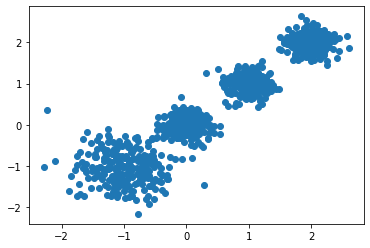

In [20]:
# X为样本特征，Y为样本簇类别， 共1000个样本，每个样本2个特征，共4个簇，簇中心在[-1,-1], [0,0],[1,1], [2,2]， 簇方差分别为[0.4, 0.2, 0.2]
centers = [[-1,-1],[0,0], [1,1], [2,2]]
cluster_std = [0.4, 0.2, 0.2, 0.2]
X, y = make_blobs(n_samples=1000, n_features=2, centers = centers, cluster_std = cluster_std, random_state = 666)
plt.scatter(X[:, 0], X[:, 1], marker='o')
print(X.shape)
plt.show()

[0 1 1 0 1]


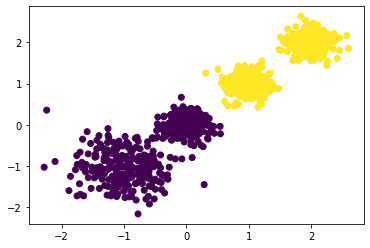

In [21]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state = 666)   #将数据集分为2类
y_pre = km.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c= y_pre) #c 为color 使得y_pre 的数据是另一种颜色。
# plt.show()
print(y_pre[:5])    # [0 1 1 0 1] 将X 每行对应的数据 为y_pre 类

In [22]:

# 使用Calinski-Harabasz Index评估的聚类分数: 分数越高，表示聚类的效果越好
from sklearn.metrics import calinski_harabasz_score
print(calinski_harabasz_score(X, y_pre))

3088.084577541466


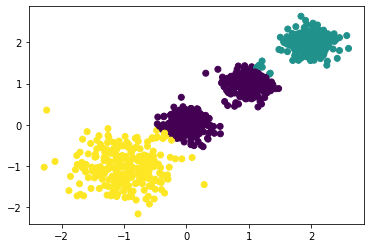

In [23]:
#将簇分为3类
y_pre1 = KMeans(n_clusters=3, random_state=666).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c =y_pre1)
plt.show()

In [24]:
print(calinski_harabasz_score(X, y_pre1))

2963.0232832196702


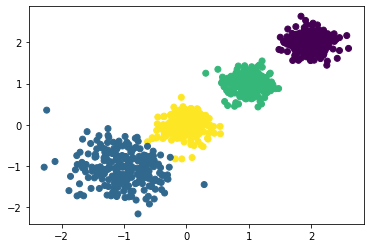

In [25]:
#将簇分为4类
y_pre2 = KMeans(n_clusters=4, random_state=666).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pre2)
plt.show()

In [26]:
print(calinski_harabasz_score(X, y_pre2))

6154.881371748304


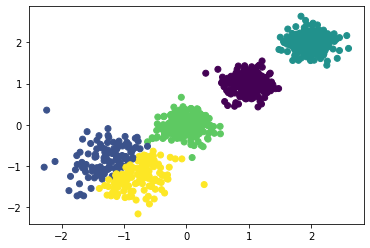

In [27]:
#将簇分为5类
y_pre2 = KMeans(n_clusters=5, random_state=666).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pre2)
plt.show()

In [28]:
print(calinski_harabasz_score(X, y_pre2))


5851.704317220252


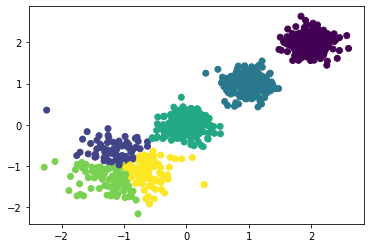

In [29]:
#将簇分为6类
y_pre2 = KMeans(n_clusters=6, random_state=666).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pre2)
plt.show()

In [30]:
print(calinski_harabasz_score(X, y_pre2))

5447.016368497616


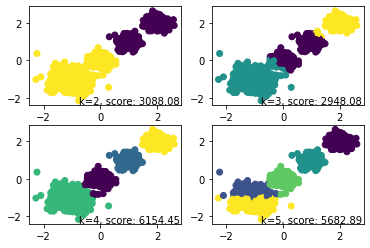

In [31]:
from sklearn.cluster import MiniBatchKMeans
for index, k in enumerate((2,3,4,5)):
    plt.subplot(2, 2, index+1)
    y_pre = MiniBatchKMeans(n_clusters=k, batch_size=200, random_state=666).fit_predict(X)
    score = calinski_harabasz_score(X, y_pre)
    plt.text(.99, .01, ('k=%d, score: %.2f'%(k, score)), transform=plt.gca().transAxes, size=10, horizontalalignment='right')
    plt.scatter(X[:, 0], X[:, 1], c=y_pre)
plt.show()